In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats
pd.options.display.max_columns=None

## EXERCICI 1

### IMPORTACION Y LIMPIEZA DEL DATASET

In [2]:
Uefa=pd.read_csv('Lligues europees UEFA.csv',encoding='latin_1',sep=';')

In [3]:
Uefa.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


In [4]:
Uefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [5]:
Uefa.nunique()

Rk                 98
Squad              98
Country             5
LgRk               20
MP                  3
W                  25
D                  13
L                  24
GF                 47
GA                 48
GD                 61
Pts                52
Pts/G              61
xG                 87
xGA                88
xGD                91
xGD/90             77
Last 5             80
Attendance         98
Top Team Scorer    98
Goalkeeper         98
dtype: int64

In [6]:
Uefa.Country.value_counts()

ENG    20
ESP    20
FRA    20
ITA    20
GER    18
Name: Country, dtype: int64

In [7]:
Uefa.LgRk.value_counts()

1     5
2     5
17    5
18    5
16    5
15    5
14    5
13    5
12    5
11    5
10    5
9     5
8     5
7     5
6     5
5     5
4     5
3     5
19    4
20    4
Name: LgRk, dtype: int64

### DESCRIPCION DE LOS DATOS  

El dataset recoge datos referentes a los resultados de una temporada de las 5 grandes ligas de football europeas de la UEFA (desconocemos la temporada).  

El dataset tiene 98 lineas, una por cada equipo participante, y 21 columnas correspondientes a las siguientes variables :

#### VARIABLES

Rk      : un ranking de 0 a 20  
Squad   : el nombre del equipo   
Country : el país del equipo 
(hay 5 países, Inglaterra, Francia, España, Alemania e Italia)  
LgRk    : la mejor posición obtenida por cada equipo en cualquiera de las 5 ligas  
MP	    : el total de partido jugados por el equipo  
W	    : el total de partidos ganados  
D	    : el total de partidos empatados  
L	    : el total de partidos perdidos  
GF	    : el total de goles a favor  
GA	    : el total de goles en contra  
GD	    : la diferencia de goles (GF-GA)  
Pts	    : la suma de puntos de la competición (W=3, D=1, L=0)  
Pts/G   : el coeficiente de puntos por goal a favor  
xG	    : la previsión de goles a favor  
xGA	    : la previsión de goles en contra  
xGD	    : la previsión de diferencia de goles  
xGD/90	: la previsión de diferencia de goles por partido (90 mn)  
Last 5	: el resultado de los 5 últimos partidos  
Attendance	    : la asistencia media de público por partido jugado por cada equipo  
Top Team Scorer	: el máximo goleador del equipo  
Goalkeeper	    : el portero del equipo  

In [8]:
Uefa.isna().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [9]:
Uefa.describe(include='all')

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
count,98.000000,98,98,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98,98.000000,98,98
unique,NaN,98,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,NaN,98,98
top,NaN,Manchester City,ENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W W W L L,NaN,Kevin De Bruyne - 15,Ederson
freq,NaN,1,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1,1
mean,49.500000,NaN,NaN,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,NaN,24239.857143,NaN,NaN
std,28.434134,NaN,NaN,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,NaN,14874.171842,NaN,NaN
min,1.000000,NaN,NaN,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,NaN,5870.000000,NaN,NaN
25%,25.250000,NaN,NaN,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,NaN,12355.500000,NaN,NaN
50%,49.500000,NaN,NaN,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,NaN,20491.000000,NaN,NaN
75%,73.750000,NaN,NaN,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,NaN,32382.000000,NaN,NaN


### TEST DE HIPOTESIS CON UNA VARIABLE

El sentido común parece indicar que la media de diferencia de goles de todos los equipos participantes es 0.No obstante, si escogemos una muestra aleatoria del dataset, esta diferencia no es 0. 

Queremos validar en que medida la diferencia observada en la media de diferencia de goles en una muestra cualquiera es compatible con una media de la población de 0. Vamos a comprobarlo con un test de hipotesis.

Seleccionamos una muestra aleatoria de 30 elementos:

In [10]:
muestra=Uefa.sample(n=30)

In [11]:
muestra.head(3)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
23,24,Strasbourg,FRA,5,37,17,12,8,60,39,21,63,1.70,58.5,39.9,18.5,0.50,W L D W W,23462,Ludovic Ajorque - 12,Matz Sels
44,45,Sassuolo,ITA,11,37,13,11,13,64,63,1,50,1.35,55.6,63.9,-8.3,-0.22,L L L D W,7638,Gianluca Scamacca - 16,Andrea Consigli
36,37,West Ham,ENG,7,37,16,8,13,59,48,11,56,1.51,49.8,49.4,0.4,0.01,D L L W D,58370,Jarrod Bowen - 12,?ukasz Fabia?ski


In [12]:
muestra.describe(include='all')

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
count,30.000000,30,30,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30,30.000000,30,30
unique,NaN,30,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,NaN,30,30
top,NaN,Strasbourg,ITA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W W W W W,NaN,Ludovic Ajorque - 12,Matz Sels
freq,NaN,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,1
mean,43.866667,NaN,NaN,9.200000,36.400000,14.633333,9.166667,12.600000,54.600000,48.40000,6.200000,53.033333,1.455333,52.303333,47.256667,5.036667,0.135333,NaN,23464.166667,NaN,NaN
std,25.371357,NaN,NaN,5.175539,1.132589,5.653704,3.227931,4.383354,14.798882,13.22641,24.833792,15.499685,0.410725,11.094064,9.501712,18.208495,0.497800,NaN,14941.399406,NaN,NaN
min,1.000000,NaN,NaN,1.000000,34.000000,4.000000,5.000000,3.000000,27.000000,24.00000,-38.000000,28.000000,0.760000,34.500000,26.800000,-23.400000,-0.630000,NaN,5870.000000,NaN,NaN
25%,24.250000,NaN,NaN,5.250000,36.250000,10.250000,7.000000,10.250000,43.750000,38.00000,-10.000000,42.500000,1.220000,44.675000,40.375000,-8.375000,-0.227500,NaN,11628.250000,NaN,NaN
50%,44.000000,NaN,NaN,9.500000,37.000000,13.000000,8.000000,13.000000,52.500000,47.50000,4.500000,50.000000,1.350000,52.300000,45.550000,1.450000,0.040000,NaN,17639.500000,NaN,NaN
75%,59.750000,NaN,NaN,12.750000,37.000000,17.750000,11.000000,16.000000,62.750000,57.50000,20.250000,62.250000,1.700000,58.075000,53.100000,17.475000,0.475000,NaN,35468.250000,NaN,NaN


In [13]:
round(muestra.GD.mean(),3)

6.2

La idea es utilizar **LA PRUEBA DEL TEST DE STUDENT DE UNA MUESTRA (one sample t-test)**.  

Antes de poder usar este test, tenemos que validar si los siguientes supuestos se cumplen:
- La muestra está extraida al azar (randomly) de la población estudiada : SI
- La variable estudiada está normalmente distribuida en la población : vamos a verlo con un test de Shapiro Wilk

#### TEST DE SHAPIRO WILK  DE LA POBLACION

H0 : GD está normalmente distribuida  
H1 : GD no está normalmente distribuida

In [41]:
from scipy.stats import shapiro

data = Uefa['GD']
stat, p = shapiro(data)
print('stat',stat,'p-value',p)


stat 0.9861291646957397 p-value 0.39621347188949585


Como el p_value es muy superior al 5%, aceptamos H0 conforme la variable GD está normalmente distribuida en la población.  

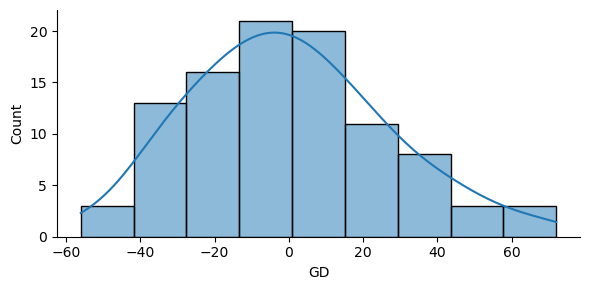

In [15]:
sns.displot(x=Uefa.GD,kde=True,height=3,aspect=2)
plt.show()

#### TEST DE STUDENT DE UNA MUESTRA 

H0 : la media de diferencias de goles es 0  
H1 : la media de diferencias de goles no es igual a 0

In [16]:
from scipy.stats import ttest_1samp

In [17]:
ttest,p_value=ttest_1samp(muestra['GD'],popmean=0)

In [18]:
print(p_value)

0.18199204326191654


Como el p_value es muy superior al 5%, aceptamos H0 conforme **la media de diferencias de goles de la población es 0**.

In [19]:
Uefa['GD'].mean()

0.0

Efectivamente, la media de la población es 0.

## EXERCICI 2

### TEST DE HIPOTESIS CON 2 VARIABLES  

Nos planteamos si los resultados (total de puntos o 'Pts') por país son similares o diferentes.



In [20]:
Uefa.groupby(['Country']).mean()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
Country,,,,,,,,,,,,,,,,
ENG,49.400000,10.5,36.5,13.950000,8.600000,13.950000,50.9,50.9,0.0,50.450000,1.381500,49.610000,49.600000,-0.010000,0.002000,39538.700000
ESP,50.450000,10.5,37.0,13.050000,10.900000,13.050000,46.5,46.5,0.0,50.050000,1.352500,45.525000,45.510000,-0.010000,0.000500,22937.600000
FRA,49.350000,10.5,37.0,13.600000,9.800000,13.600000,51.5,51.5,0.0,50.500000,1.365500,48.650000,48.655000,-0.005000,-0.000500,20314.000000
GER,47.888889,9.5,34.0,12.944444,8.111111,12.944444,53.0,53.0,0.0,46.944444,1.381111,50.166667,50.155556,-0.005556,0.001111,21025.055556
ITA,50.250000,10.5,36.8,13.650000,9.500000,13.650000,52.7,52.7,0.0,50.450000,1.371500,49.465000,49.460000,0.005000,0.001500,17062.450000


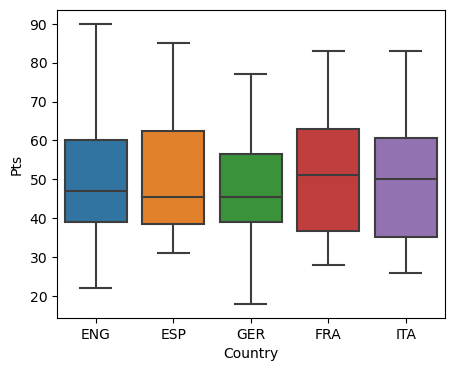

In [21]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.boxplot(data=Uefa,x='Country',y='Pts',orient='v')
plt.show()

Estos análisis semblan indicar que las medias de puntos por país son muy similiares entre si. Vamos a comprobarlo con un test de hipotesis.

La idea es utilizar **LA PRUEBA DEL TEST DE STUDENT CON DOS MUESTRAS**, una muestra con los equipos de Inglaterra, otra muestra con los equipos de Alemania.

Antes de poder usar este test, tenemos que validar si los siguientes supuestos se cumplen:
- Las observaciones en cada muestra son independientes : SI
- Las observaciones en cada muestra están normalmente distribuidas : vamos a valorarlo con un test de Shapiro Wilk
- Las obervaciones en cada muestra tienen la misma varianza : vamos a valorarlo con un test de Levene



In [22]:
muestra_1=Uefa[Uefa['Country']=='ENG']
muestra_1.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
10,11,Chelsea,ENG,3,36,20,10,6,73,31,42,70,1.94,63.2,34.9,28.4,0.79,W D L D W,36991,Mason Mount - 11,Edouard Mendy
14,15,Tottenham,ENG,4,37,21,5,11,64,40,24,68,1.84,61.5,39.0,22.5,0.61,D W D W W,56234,Son Heung-min - 21,Hugo Lloris
17,18,Arsenal,ENG,5,36,21,3,12,56,45,11,66,1.83,56.3,44.0,12.2,0.34,W W W W L,59636,Bukayo Saka - 11,Aaron Ramsdale


In [23]:
muestra_2=Uefa[Uefa['Country']=='GER']
muestra_2.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
8,9,Dortmund,GER,2,34,22,3,9,85,52,33,69,2.03,62.8,43.2,19.6,0.58,W L L W W,41800,Erling Haaland - 22,Gregor Kobel
12,13,Leverkusen,GER,3,34,19,7,8,80,47,33,64,1.88,63.3,43.1,20.2,0.59,L W W W W,17356,Patrik Schick - 24,Luká Hrádeck?
22,23,RB Leipzig,GER,4,34,17,7,10,72,37,35,58,1.71,63.4,41.8,21.6,0.64,W L L W D,22124,Christopher Nkunku - 20,Péter Gulácsi
25,26,Union Berlin,GER,5,34,16,9,9,50,44,6,57,1.68,50.5,41.6,8.8,0.26,W W D W W,14046,Taiwo Awoniyi - 15,Andreas Luthe


#### TEST DE SHAPIRO WILK  DE LAS DOS MUESTRAS

H0 : la muestra está normalmente distribuida  
H1 : la muestra no está normalmente distribuida

In [24]:
stats.shapiro(muestra_1['Pts'])

ShapiroResult(statistic=0.9504321217536926, pvalue=0.3736962676048279)

In [25]:
stats.shapiro(muestra_2['Pts'])

ShapiroResult(statistic=0.987581729888916, pvalue=0.9953233599662781)

En ambos casos, el p-value es claramente superior a 5%, aceptamos H0 conforme la variable 'Pts' está normalmente distribuida en ambas muestras.

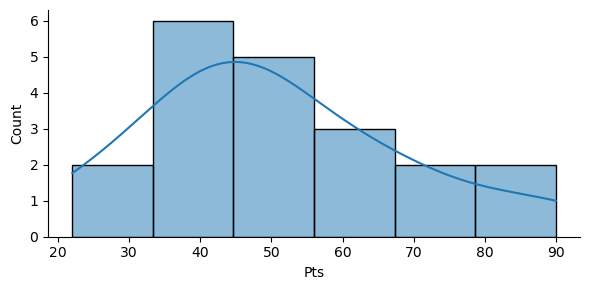

In [26]:
sns.displot(muestra_1['Pts'], kde=True,height=3,aspect=2)
plt.show()

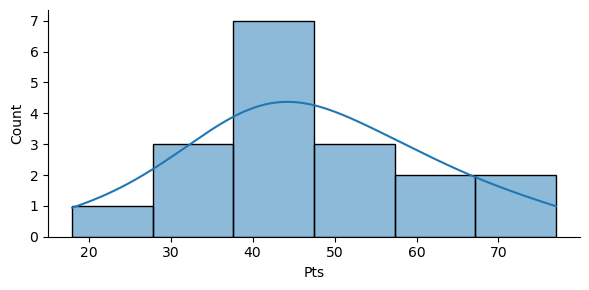

In [27]:
sns.displot(muestra_2['Pts'], kde=True,height=3,aspect=2)
plt.show()

#### TEST DE LEVENE (HOMOGENEIDAD DE LAS VARIANZAS)  

H0 : las varianzas no son significativamente diferentes entre si (homogeneidad)  
H1 : las varianzas son significativamente diferentes entre si

In [28]:
stats.levene(muestra_1['Pts'], muestra_2['Pts'])

LeveneResult(statistic=0.4366243400173789, pvalue=0.5129628433985536)

El p-value es claramente superior a 5%, aceptamos H0 conforme la varianza de las 2 muestras no es significativamente diferente, es decir son homogéneas.

Todos los supuestos se cumplen, podemos aplicar el test.

#### TEST DE STUDENT DE DOS MUESTRAS  

H0 : las medias de las muestras son iguales  
H1 : las medias de las muestras son diferentes

In [31]:
from scipy.stats import ttest_ind
data1 = muestra_1['Pts']
data2 = muestra_2['Pts']
stat, p = ttest_ind(data1, data2)
print('stat',stat,'p_value',p)


stat 0.6430378207487817 p_value 0.5242745442222266


El p-value es claramente superior a 5%, aceptamos H0 conforme **la media de las 2 muestras no es significativamente diferente**.

Podríamos aplicar el mismo test al resto de países, para concluir que efectivamente, no hay diferencia sustancial entre la media de puntos por país.

## EXERCICI 3


### TEST DE HIPOTESIS CON 3 VARIABLES  

Nos planteamos cuales son los posibles factores que influyen en la asistencia media a los partidos.  Un factor posible es la previsión de goles (cuanto más goles esperados, más asistentes al partido).  Otro factor podría ser el país, según la cultura futbolistica es similar o no en cada uno de los 5 países de la UEFA.

Vamos a usar varias herramientas estadísticas para intentar dar respuesta a estas preguntas:

#### RELACION ENTRE ASISTENCIA Y PREVISIÓN DE GOLES

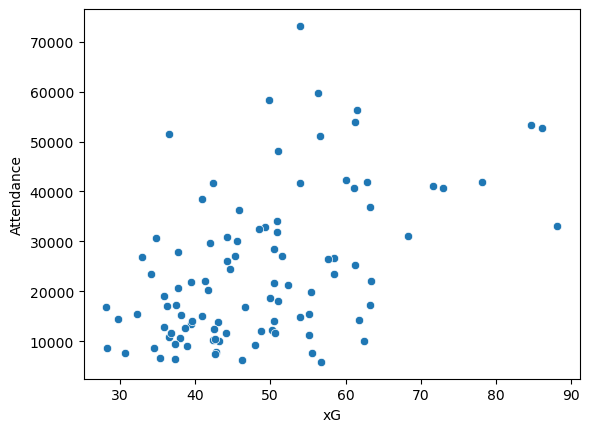

In [32]:
sns.scatterplot(data=Uefa,x='xG',y='Attendance')
plt.show()

In [33]:
np.corrcoef(Uefa['xG'],Uefa['Attendance'])

array([[1.        , 0.49327846],
       [0.49327846, 1.        ]])

Parece haber una cierta relación de correlación. La idea es usar un test de correlación para comprobarlo.

#### TEST DE SHAPIRO WILK DE LAS DOS MUESTRAS

In [34]:
stats.shapiro(Uefa['Attendance'])

ShapiroResult(statistic=0.9071446061134338, pvalue=3.7994775539118564e-06)

In [35]:
stats.shapiro(Uefa['xG'])

ShapiroResult(statistic=0.9401810765266418, pvalue=0.00023106664593797177)

Los p_value tienden a 0, las muestras no están normalmente distribuidas, podemos usar entonces el test de correlación de Spearman.

#### TEST DE CORRELACION DE SPEARMANR  

H0 : las variables no tienen correlación  
H1 : las variables tienen correlación ¶

In [36]:
from scipy.stats import spearmanr
data1 = Uefa['Attendance']
data2 = Uefa['xG']
stat, p = spearmanr(data1, data2)
print('stat',stat,'p_value',p)


stat 0.45553979349574447 p_value 2.438520286357803e-06


El p_value tiende a 0, tenemos que rechazar la hipotesis H0. Las dos variables están muy probablemente correlacionadas, es decir **cuanta más previsión de goles, más asistencia**.

#### IMPACTO DEL PAIS SOBRE  ESTA RELACIÓN   

Vamos ahora a analizar si el país de origen del equipo puede moderar o incrementar el efecto de la previsión de goles sobre la asistencia al partido. Es decir, la correlación entre previsión de goles y asistencia cambia en función del país?

Vamos a construir un facetplot de asistencia según la previsión de goles, para cada país :


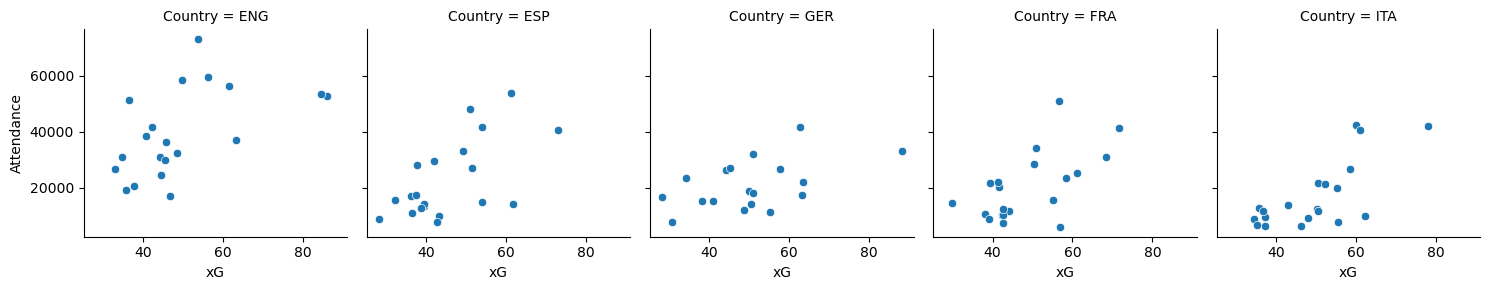

In [37]:
g = sns.FacetGrid(Uefa,
    col="Country")
g.map(sns.scatterplot, "xG", "Attendance")
plt.show()

Podemos ver por ejemplo que la pendiente de xG vs asistencia es mucho más plana en Alemania que en Inglaterra, es decir, tendería a mostrar que en Alemania, al público le da bastante igual la previsión de goles en su decisión de asistir a un partido, y en Inglaterra, no tanto. 

Para formalizar esta diferencia, vamos a estudiar en bucle los diferentes paises, crear los correspondientes subsets y aplicar Spearmanr test para cada país:

In [38]:
list_1=['ENG','FRA','GER','ITA','ESP']

In [39]:
for i in list_1:
    subset = Uefa[Uefa['Country'] == i]
    print('Attendance per expected Goals for ' + str(i))
    res = spearmanr(subset['xG'], subset['Attendance'])
    print('Spearmanr correlation coefficient: ' + str(res[0]))
    print('Associated p-value: ' + str(res[1]))
    print('')

Attendance per expected Goals for ENG
Spearmanr correlation coefficient: 0.6015037593984961
Associated p-value: 0.0050232025868820335

Attendance per expected Goals for FRA
Spearmanr correlation coefficient: 0.5022556390977443
Associated p-value: 0.024024689465215552

Attendance per expected Goals for GER
Spearmanr correlation coefficient: 0.42002063983488136
Associated p-value: 0.08267356720316324

Attendance per expected Goals for ITA
Spearmanr correlation coefficient: 0.613533834586466
Associated p-value: 0.004013734729903659

Attendance per expected Goals for ESP
Spearmanr correlation coefficient: 0.4806318504619453
Associated p-value: 0.03194355471787026



El p_value de cada país nos indica la fuerza de la correlación entre previsión de goles y asistencia en cada uno de los países.

Como podemos constatar, la fuerza de la correlación entre previsión de goles y asistencia es sustancialmente más alta en el caso de Inglaterra que Alemania (Inglaterra tiene un p-value cerca de 10 veces inferior al de Alemania).
